# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [4]:
x, y = data.drop(['id', 'cardio'], axis=1), data.cardio

In [6]:
x.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [59]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import researchpy as rp

Нормализуем данные:

In [8]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(x)
x_norm = pd.DataFrame(np_scaled)

In [30]:
x_norm.columns = data.drop(['id', 'cardio'], axis=1).columns

In [31]:
x_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y, test_size = 0.3, random_state = 42)

Создадим модель RandomForest

In [15]:
# выбираем 100 деревьев в качестве параметра
model_rf=RandomForestClassifier(n_estimators=100)
# обучаем модель
model_rf.fit(x_train,y_train)

RandomForestClassifier()

Качество модели:

In [16]:
print(classification_report(y_test, model_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10461
           1       0.72      0.70      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



Наиболее важные атрибуты для модели Random Forest:

No handles with labels found to put in legend.


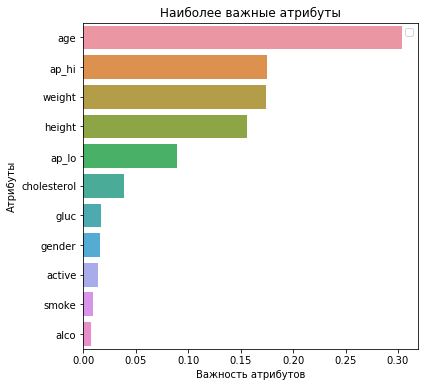

In [26]:
headers = list(data.drop(['id', 'cardio'], axis=1).columns)

feature_imp = pd.Series(model_rf.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Наиболее значимый атрибут - возраст (age). Проверим гипотезу, что возраст влияент уровень заболевания. Посколько мы нормализовали данны, то может разделить на два класса по переменной age - условно молодое(young) и старшее (old) поколение, чтобы получить близкое количество элементов в каждом массиве:

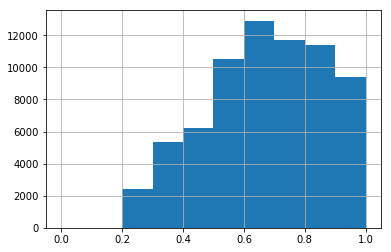

In [39]:
x_norm['age'].hist()

In [48]:
x_norm["cardio"] = data.cardio
young = x_norm[x_norm['age']<=0.7].cardio
old = x_norm[x_norm['age']>0.7].cardio

In [49]:
young.shape, old.shape

((37486,), (32514,))

In [ ]:
descriptives, results = rp.ttest(young, old)

In [50]:
from scipy import stats

In [53]:
s, p = stats.ttest_ind(young,old)

In [58]:
print(p)

0.0


In [56]:
descriptives, results = rp.ttest(y, x_norm.age)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,70000.0,0.499700,0.500003,0.001890,0.495996,0.503404
1,age,70000.0,0.671379,0.191038,0.000722,0.669964,0.672795
2,combined,140000.0,0.585540,0.388094,0.001037,0.583507,0.587573


In [57]:
results

,Independent t-test,results
0,Difference (cardio - age) =,-0.1717
1,Degrees of freedom =,139998.0000
2,t =,-84.8606
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4536
7,Hedge's g =,-0.4536
8,Glass's delta =,-0.3434
9,r =,0.2212


p-value < 0.05, поэтому можно сказать что имеется статистическое различие между рассматриваемыми группами